In [24]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [25]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))

x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_test.shape)

(10000, 784)


In [26]:
import keras 
from keras import layers

encoding_dim=32
input_img=keras.Input(shape=(784,))
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(784,activation='sigmoid')(encoded)

In [28]:
autoencoder=keras.Model(input_img,decoded)
encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encoding_dim,))

decoder_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))



Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2867 - val_loss: 0.2071
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1878 - val_loss: 0.1709
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1623 - val_loss: 0.1521
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1456 - val_loss: 0.1373
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1342 - val_loss: 0.1295
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1282 - val_loss: 0.1239
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1226 - val_loss: 0.1189
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1184 - val_loss: 0.1153
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1154 - val_loss: 0.1127
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1132 - val_loss: 0.1104

In [29]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)


313/313 [==============================] - 0s 689us/step


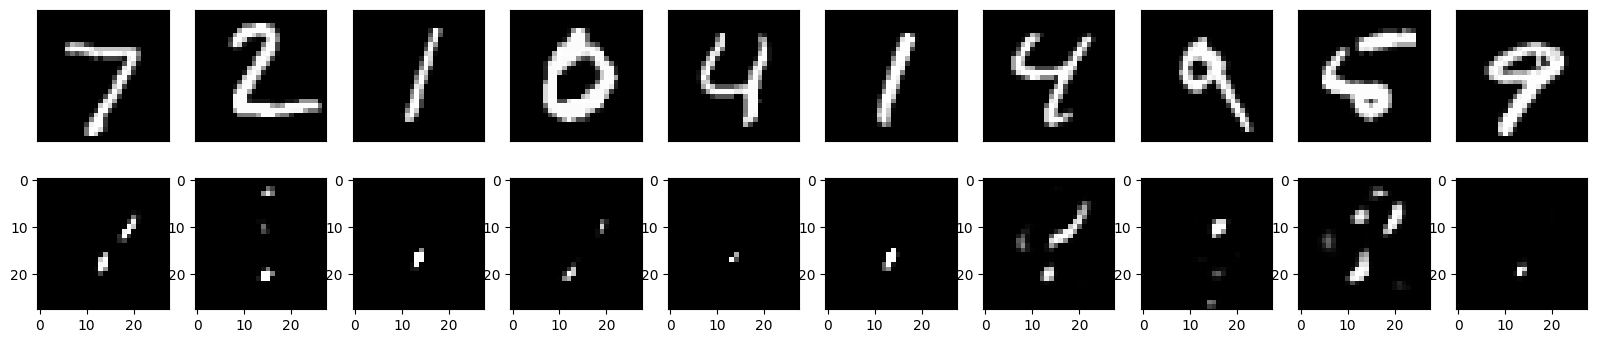

In [31]:
import matplotlib.pyplot as plt
n=10

plt.figure(figsize=(20,4))

for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape((28,28)))
    plt.gray()

    x=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

